# Shark Attacks Analysis

### TENDENCIAS EN ATAQUES DE TIBURON

Partiendo del histórico de ataques de tiburón registrados desde el año 1800, se analiza la predominancia de estos ataques según época y año, así como los países que más víctimas registran. Para los dos países más representativos, se muestran las razones y el tipo de ataque según la parte del cuerpo afectada.

- Importamos librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import re
import calendar
import scr.fun as f
import matplotlib.pyplot as plt

- Creación del DataFrame. Es necesario utilizar la codificación como latin1 ya que el archivo contiene caracteres especiales.

In [2]:
df = pd.read_csv('INPUT/GSAF5.csv', encoding = 'latin1')

- Configuración para poder ver todas las filas y columnas para una mejor exploración de los datos que dispongo y pensar cómo puedo limpiarlos.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### PASO 1: Inspección y descarte de datos.

In [4]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

CONCLUSIONES:
1. Observo algún error a corregir en el nombre de algunas las columnas al incluir espacios.
2. A primera vista, parece que hay columnas con datos repetidos, como 'href formula' y 'href' o 'Case Number' y 'Case Number.1' y 'Case Number.2'.
3. Existen columnas cuyo nombre no nos dice mucho, que probablemente no contengan datos relevantes, como 'Unnamed: 22' y 'Unnamed: 23'.

Por otro lado, compruebo el porcentaje de datos nulos que contiene el archivo por cada columna.

In [5]:
percentage = (round(df.isnull().sum()/df.shape[0]*100,2))

print('\nPercentage of nulls per column:\n\n{}'.format(percentage.apply(lambda x: f'{x}%')))


Percentage of nulls per column:

Case Number                 0.0%
Date                        0.0%
Year                        0.0%
Type                        0.0%
Country                    0.72%
Area                       6.71%
Location                   8.28%
Activity                    8.8%
Name                       3.34%
Sex                        9.46%
Age                       44.74%
Injury                     0.45%
Fatal (Y/N)                0.32%
Time                      53.62%
Species                   48.97%
Investigator or Source     0.25%
pdf                         0.0%
href formula               0.02%
href                       0.05%
Case Number.1               0.0%
Case Number.2               0.0%
original order              0.0%
Unnamed: 22               99.98%
Unnamed: 23               99.97%
dtype: object


CONCLUSIONES:
1. Confirmo que las columnas 'Unnamed' están prácticamente vacías, por lo que podemos eliminarlas.
2. Las columnas 'Species', 'Time' y 'Age' tienen un alto porcentaje de celdas vacías, por tanto, dificulta su análisis y no las tendremos en cuenta.

En cuanto a las posibles columnas con valores duplicados, las comparo con sus parecidos para confirmar si existen valores diferentes o no.

- Comparación de columna 'Case Number' con 'Case Number.1' y 'Case Number.2':

In [6]:
print(f.check_dupl_caseNumber(df,df['Case Number']))

There are 13 differences from 5992 total rows.

FALSE:
2016.09.15
2016.09.16
2016.09.15

FALSE:
2016.07.14.4
2016.07.14.R
2016.07.14.4

FALSE:
2016.01.24.b
2015.01.24.b
2016.01.24.b

FALSE:
2015.12.23
2015.11.07
2015.12.23

FALSE:
2015.10.28.a
2015.10.28
2015.10.28.a

FALSE:
2015.07-10
2015.07.10
2015.07.10

FALSE:
1967.07.05
1967/07.05
1967.07.05

FALSE:
1962,08.30.b
1962.08.30.b
1962,08.30.b

FALSE:
1961.09.02.R
1961.09,06.R
1961.09.02.R

FALSE:
1952.08.05
1952.08.04
1952.08.05

FALSE:
1934.01.08.R
1934.02.08.R
1934.02.08.R

FALSE:
1900.00.00.R
1919.00.00.R
1900.00.00.R

FALSE:
1911.07.31.R
1911.07.31.T
1911.07.31.R
None


CONCLUSIÓN:
    Como vemos, hay 13 valores diferentes de 5992 valores en total, lo que supone un 0.22%. Además, si comparamos los 3 valores que difieren, vemos que suelen coincidir dos y uno contiene algún error en número o letra. Por tanto, considero que son repetidos y se pueden eliminar.

- Comparación de columna 'href' con 'href formula':

In [7]:
print(f.check_dupl_href(df,df['href']))

There are 54 differences from 5992 total rows.

FALSE:
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2016.07.29-Spain.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.07.29-Spain.pdf

FALSE:
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.07.23-Cutbirth.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.07.23.a-Cutbirth.pdf

FALSE:
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2016.05.21.a-Girl.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.05.21.a-Girl.pdf

FALSE:
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2015.12.21.a-Brazil.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2015.12.21.a-Brazil.pdf

FALSE:
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2015.11.15.a-Engelman.pdf
h

CONCLUSIÓN:
    Como vemos, hay 54 valores diferentes de 5992 valores en total, lo que supone un 0.9%. Además, si comparamos los 2 valores que difieren, vemos que hacen referencia a lo mismo pero con otra descripción por posibles errores en el texto. Si nos fijamos en el porcentaje de valores nulos, 'href formula' además contiene más vacíos, por lo que la podemos deshechar y quedarnos solamente con 'href'.

Por tanto, según las conclusiones, elimino las columnas vacías y duplicadas:

In [8]:
drop_cols = ['Unnamed: 22', 'Unnamed: 23', 'Case Number.1', 'Case Number.2', 'href']

df = df.drop(drop_cols, axis=1)

cols_analysis = ['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 
                 'Sex ', 'Injury', 'Fatal (Y/N)', 'Investigator or Source', 'pdf', 'href formula',
                 'original order']

df1 = df.loc[:,cols_analysis]

df1.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Injury', 'Fatal (Y/N)',
       'Investigator or Source', 'pdf', 'href formula', 'original order'],
      dtype='object')

En este momento, he ido mirando los datos que contiene cada columna para identificar dificultad de limpieza, utilidad y veracidad.

- Case Number: contiene el número del caso registrado, que incluye la fecha y alguna letra. La utilidad que le voy a dar es para crear una nueva columna llamada 'Month' y poder sacar el mes en el que se dio el incidente.

- Date: contiene la fecha del incidente pero no sigue un formato determinado. Difícil de limpiar y repite datos que tenemos en la columna 'Case Number'. Descarto del análisis.

- Year: contiene el año del incidente. Bastante unificado y completo, mantengo para el análisis.

- Type: especifica si el ataque fue provocado o no. Me parece un dato inconsistente ya que no se en qué se han basado para categorizar como provocación de un ataque. Si comparo con las actividades realizadas durante el ataque, el surf se considera tanto en provocado como no provocado, al igual que el nado o la pesca. Descarto del análisis.

- Country: especifica el país donde se ha dado el ataque. Contiene pocos datos nulos y parece consistente. Mantengo para el análisis.

- Area: especifica la ciudad/estado en el que ha surgido el ataque. Me basaré en el país del incidente, por tanto, descarto del análisis.

- Location: especifica la playa donde se ha dado el ataque. Contiene muy pocos datos agrupados. Me basaré en el país del incidente, por tanto, descarto del análisis.

- Activity: especifica la actividad que realizaba la víctima en el momento del ataque. Los datos están muy dispersos y hay que reagruparlos bajo una misma categoría. Mantengo para el análisis.

- Name: se pretende identificar el nombre de la víctima pero la gran mayoría son datos sin especificar. No nos interesa para el análisis.

- Sex: determina el sexo de la víctima. Casi un 10% de los datos son nulos, lo que considero demasiado para tener en cuenta en el análisis.

- Injury: especifica en qué parte del cuerpo fue el ataque. Datos muy dispersos que hay que reagrupar bajo una misma categoría. Mantengo para el análisis.

- Fatal: identifica si el ataque fue mortal o tuvo consecuencias graves para la víctima (o eso entiendo yo). Como la interpretación es ambigua y, además, la categoría fatal también aparece en la columna de 'Injury', lo descarto del análisis.

- Investigator or Source: especifica la fuente. Está muy atomizado y no necesito esta información para el análisis, por tanto, lo descarto.

- pdf y href formula: uno contiene los enlaces completos al pdf del caso, y el otro contiene solo el nombre del pdf. Al no necesitarlo para el análisis, lo descarto.

- Original order: no se a qué hacen referencia los números aportados, por lo que, descarto del análisis.

In [9]:
cols_analysis = ['Case Number', 'Year', 'Country', 'Activity', 'Injury']

attacks = df.loc[:,cols_analysis]

attacks.columns

Index(['Case Number', 'Year', 'Country', 'Activity', 'Injury'], dtype='object')

### PASO 2: Limpieza de datos

#### COLUMNA MONTH

Creo una columna con el mes en el que ha surgido el ataque, en base a la columna 'Case Number'.

In [10]:
# Extraigo el mes de la columna 'Case Number':

attacks['Month'] = attacks['Case Number'].str.extract('(\.\d{2}\.)')

# Elimino los dos puntos que se han extraido:

attacks['Month'] = attacks['Month'].str.extract('(\d{2})')

# En algunos casos, el 'Case Number' no indica el mes por falta de información. Sustituyo los valores nulos por 0:

attacks.Month = attacks.Month.fillna(0).astype('int')

# Cambio los valores extraidos por el nombre del mes correspondiente:

for x in range(1,13):
    
    attacks.loc[attacks['Month'] == x, 'Month'] = calendar.month_name[x]
    attacks.loc[attacks['Month'] == 30, 'Month'] = 'August'

# Los valores nulos sustituidos por 0, los identifico como 'Unknown'. Suponen un 6.4% sobre el total:

attacks.loc[attacks['Month'] == 0, 'Month'] = 'Unknown'

Compruebo el peso que tiene cada mes sobre el total de registros para comprobar que los nulos no suponen un porcentaje muy elevado. En este momento suponen un 8.7%, sin embargo, a lo largo del análisis este porcentaje bajará hasta el 6.4% debido a la omisión de algunos de los datos que considero a descartar más adelante.

In [11]:
percentage = (round(attacks.Month.value_counts()/attacks.shape[0]*100,2))

print('\nPercentage of nulls per month:\n\n{}'.format(percentage.apply(lambda x: f'{x}%')))


Percentage of nulls per month:

July         10.56%
August        9.68%
September     8.74%
Unknown       8.73%
January       8.34%
June          7.91%
December      7.06%
April         6.84%
October       6.79%
March         6.64%
November      6.56%
May           6.14%
February      5.99%
Name: Month, dtype: object


In [12]:
order = ['Case Number', 'Month', 'Year', 'Country', 'Activity', 'Injury']

attacks = attacks.loc[:,order]

attacks.head()

,Case Number,Month,Year,Country,Activity,Injury
0,2016.09.18.c,September,2016,USA,Surfing,Minor injury to thigh
1,2016.09.18.b,September,2016,USA,Surfing,Lacerations to hands
2,2016.09.18.a,September,2016,USA,Surfing,Lacerations to lower leg
3,2016.09.17,September,2016,AUSTRALIA,Surfing,Struck by fin on chest & leg
4,2016.09.15,September,2016,AUSTRALIA,Surfing,No injury: Knocked off board by shark


#### COLUMNA YEAR

Elimino de la tabla valores anteriores al año 1800, ya que debido a su antiguedad son poco fiables, ofrecían poca información en las columnas restantes, al igual que los años con valor 0. Con ello también eliminamos datos errónes que teníamos al final de la serie, como el año 500, 77 o 5.

In [13]:
# Compruebo los valores únicos de la columna:

display(attacks["Year"].unique())

# Decido no tener en cuenta los datos anteriores al año 1800 por prudencia.

attacks = attacks[attacks["Year"] >= 1800]

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988, 1987, 1986,
       1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974,
       1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964, 1963, 1962,
       1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951,
       1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943, 1942, 1941,
       1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930,
       1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920, 1919,
       1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910, 1909, 1908,
       1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899, 1898, 1897,
       1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888, 1887, 1886,
       1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877, 1876, 1875,
       1874, 1873, 1872, 1871, 1870, 1869, 1868, 18

#### COLUMNA COUNTRY

Adapto los nombres a un formato correcto y, tanto los nulos como los que no aparecen más de 10 veces en el DataFrame, los categorizo como 'Otros' para reducir la atomización de datos.

In [14]:
# Hay 35 celdas vacías que categorizo como 'Otros':

attacks.Country = attacks.Country.fillna('OTHER')

# Adapto los nombres a mayúsculas y quito los espacios que contengan:

attacks['Country'] = attacks['Country'].str.upper()

attacks['Country'] = f.first_space(attacks['Country'].str)

# Mantengo los nombres de los países que se repiten más de 10 veces:

attacks_country = attacks['Country'].value_counts()
attacks_country = attacks_country[attacks_country >= 10]

# El resto, los agrupo como 'Otros', categoría que supone un 7,6% del total:

ind = attacks_country.index.tolist()

countries = []

for i in range(len(attacks.index)):
    if attacks.loc[i,'Country'] in ind:
        countries.append(attacks.loc[i,'Country'])
    else:
        countries.append('OTHER')
        
attacks["Country"] = countries

In [15]:
percentage = (round(attacks.Country.value_counts()/attacks.shape[0]*100,2))

print('\nPercentage of nulls per country:\n\n{}'.format(percentage.apply(lambda x: f'{x}%')))


Percentage of nulls per country:

USA                     35.93%
AUSTRALIA                21.6%
SOUTH AFRICA             9.55%
OTHER                    7.66%
PAPUA NEW GUINEA         2.21%
NEW ZEALAND              2.13%
BRAZIL                   1.75%
BAHAMAS                  1.63%
MEXICO                   1.37%
ITALY                    1.15%
FIJI                     1.06%
PHILIPPINES              1.03%
REUNION                  0.94%
NEW CALEDONIA            0.87%
MOZAMBIQUE               0.72%
CUBA                     0.69%
SPAIN                    0.65%
EGYPT                    0.62%
CROATIA                  0.58%
INDIA                    0.55%
JAPAN                    0.55%
PANAMA                    0.5%
SOLOMON ISLANDS          0.46%
IRAN                     0.43%
HONG KONG                0.41%
JAMAICA                  0.39%
FRENCH POLYNESIA         0.36%
INDONESIA                0.33%
GREECE                   0.33%
ENGLAND                  0.31%
TONGA                    0.31%
ATLA

#### COLUMNA ACTIVITY

Esta columna, al ser descriptiva, contiene muchos datos que describen una misma actividad de diferentes maneras, por tanto, es necesario unificar bajo una misma categoría. Llegado a un punto donde las datos se dispersan mucho, los englobo bajo un mismo concepto de 'Otros', que suponen solo el 6.6% total de datos saneados.

In [16]:
# Hay 497 celdas vacías que categorizo como 'Desconocido':

attacks.Activity = attacks.Activity.fillna('Unknown')

# Agrupo actividades afines bajo un mismo nombre:

activity_changes = {
    'Surfing':['surf'],
    'Swimming':['swim','bath','float','water','splash'],
    'Fishing':['fish','crab','clam','kill','hunt','catch''shoot'],
    'Diving':['div','snork'],
    'Shore':['wad','stand','walk','tread','wash','sit','play'],
    'Water sports':['kayak','board','row','canoe','sail','boat','paddl','fell']
}

for key, value in activity_changes.items():
    for elem in value:
        attacks.loc[attacks['Activity'].str.contains(elem, case=False), 'Activity'] = key
        
# Mantengo las actividades que se repitan más de 10 veces:

attacks_activities = attacks['Activity'].value_counts()
attacks_activities = attacks_activities[attacks_activities >= 10]

# El resto, los agrupo como Otros, categoría que supone un 6.6% del total:

ind = attacks_activities.index.tolist()

activities = []

for i in range(len(attacks.index)):
    if attacks.loc[i,'Activity'] in ind:
        activities.append(attacks.loc[i,'Activity'])
    else:
        activities.append('OTHER')

attacks["Activity"] = activities

In [17]:
percentage = (round(attacks.Activity.value_counts()/attacks.shape[0]*100,2))

print('\nPercentage of nulls per activity:\n\n{}'.format(percentage.apply(lambda x: f'{x}%')))


Percentage of nulls per activity:

Swimming        24.22%
Surfing         20.26%
Fishing         19.05%
Diving           9.07%
Unknown          8.57%
OTHER            6.69%
Water sports     6.62%
Shore            5.52%
Name: Activity, dtype: object


#### COLUMNA INJURY

Mismo caso que el anterior, con la diferencia de que agrupo según la parte del cuerpo que haya sido afectada por el ataque del tiburón. Llegado a un punto donde las datos se dispersan mucho, los englobo bajo un mismo concepto de 'Otros', que suponen solo el 6.5% del total de datos saneados.

In [19]:
# Hay 20 celdas vacías que categorizo como 'Desconocido':

attacks.Injury = attacks.Injury.fillna('Unknown')

# Agrupo los daños que ha sufrido la víctima según la parte del cuerpo afectada:

injury_changes = {
    'Leg':['foot','leg','thigh','calf','ankle','heel','toe','shin','feet','knee'],
    'Arm':['hand','arm','finger','shoul','wrist','elbo'],
    'Trunk':['torso','hip','chest','butt','back','abdom'],
    'No injury':['no injury','minor','fin','lacer'],
    'FATAL':['fatal','drow'],
    'Unknown':['survi','detail']
}

for key, value in injury_changes.items():
    for elem in value:
        attacks.loc[attacks['Injury'].str.contains(elem, case=False), 'Injury'] = key
        
# Mantengo los ataques que se repiten más de 10 veces:

attacks_injuries = attacks['Injury'].value_counts()

attacks_injuries = attacks_injuries[attacks_injuries >= 10]

# El resto, los agrupo como Otros, suponen un 6.5% del total:

ind = attacks_injuries.index.tolist()

injuries = []

for i in range(len(attacks.index)):
    if attacks.loc[i,'Injury'] in ind:
        injuries.append(attacks.loc[i,'Injury'])
    else:
        injuries.append('OTHER')

attacks["Injury"] = injuries

In [21]:
percentage = (round(attacks.Injury.value_counts()/attacks.shape[0]*100,2))

print('\nPercentage of nulls per injury:\n\n{}'.format(percentage.apply(lambda x: f'{x}%')))


Percentage of nulls per injury:

Leg          41.63%
FATAL        16.96%
Arm          14.73%
No injury    14.02%
OTHER         6.51%
Unknown        3.5%
Trunk         2.66%
Name: Injury, dtype: object


- Guardamos el csv limpio y listo para analizar

In [22]:
attacks.to_csv('OUTPUT/shark_attacks_cleaned_data.csv')

### PASO 3: Análisis

##### NUMERO DE ATAQUES POR RANGO DE AÑO: Observamos una clara tendencia positiva, registrando el mayor número de ataques entre el año 2001 y 2016. Probablemente esto se deba a que con el paso de los años se haya incrementado la labor de documentación.

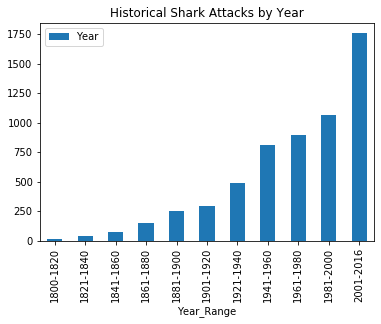

In [40]:
cutoffs = [i for i in range(1800,2021,20)]

# Es necesario corregir la list comprehension para que comience por 1800 y finalice en el año 2016
year_labels = [f'{i+1}-{i+20}' for i in range(1800,2016,20)]
year_labels[0] = '1800-1820'
year_labels[-1] = '2001-2016'

attacks['Year_Range'] = pd.cut(attacks['Year'], cutoffs, labels=year_labels)

attacks.groupby('Year_Range').agg({'Year':'count'}).plot.bar()

plt.title('Historical Shark Attacks by Year');

##### TENDENCIA DE ATAQUES SEGUN EPOCA DEL AÑO: Destacan los meses de julio, agosto y septiembre, sin embargo, no hay una clara evidencia de ser los meses más representativos, ya que la tendencia es bastante lineal. El motivo resulta de los distintos momentos del año en el que se sitúan las estaciones según la posición en el Ecuador.

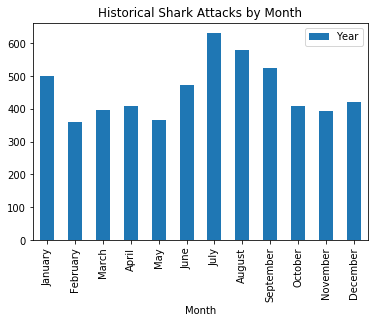

In [24]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

attacks['Month'] = pd.Categorical(attacks['Month'], categories=months, ordered=True)

attacks.groupby('Month').agg({'Year':'count'}).plot.bar()

plt.title('Historical Shark Attacks by Month');

##### Comprobamos que en USA los casos de ataques predominan en los meses de julio, agosto y septiembre, siendo la época de verano en USA.

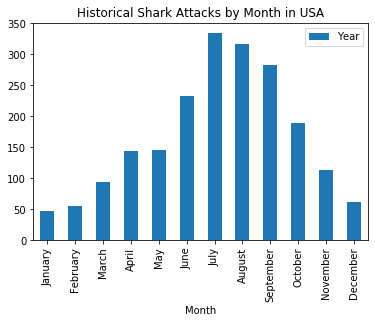

In [30]:
# Filtramos dataset por casos dados solo en USA

filt = attacks['Country'] == 'USA'
usa = attacks[filt]

# Comprobamos si la tendencia de ataques según época del año varía

usa.groupby('Month').agg({'Year':'count'}).plot.bar()
plt.title('Historical Shark Attacks by Month in USA');

##### Comprobamos que en Australia los casos de ataques predominan en los meses de diciembre y enero, siendo la época de verano en Australia.

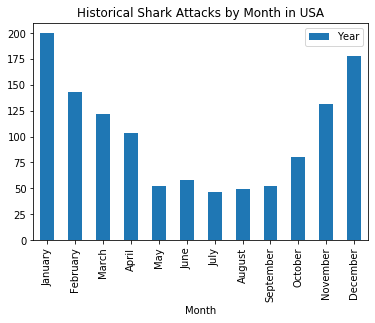

In [36]:
# Filtramos dataset por casos dados solo en USA

filt = attacks['Country'] == 'AUSTRALIA'
usa = attacks[filt]

# Comprobamos si la tendencia de ataques según época del año varía

usa.groupby('Month').agg({'Year':'count'}).plot.bar()
plt.title('Historical Shark Attacks by Month in USA');

##### TENDENCIA DE ATAQUES SEGUN PAIS: Podemos observar que la gran mayoría de los ataques de tiburón surgen en USA y Australia, donde hay mayor predominio del surf y mayor es la población.

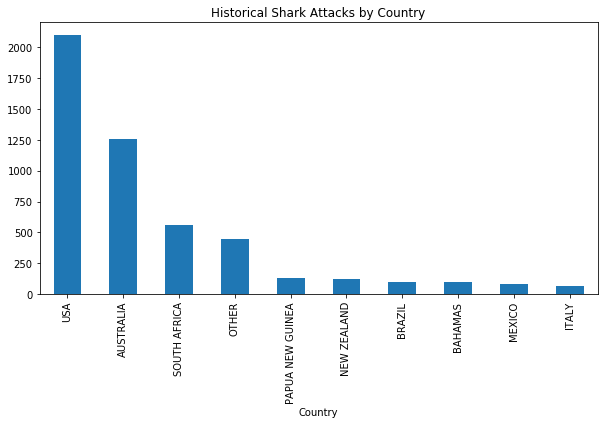

In [25]:
attacks.groupby('Country').Year.count().sort_values(ascending=False).iloc[:10].plot.bar(figsize=(10,5))

plt.title('Historical Shark Attacks by Country');

##### RAZONES DE ATAQUE EN USA: La probabilidad de sufrir un ataque de tiburón en USA es mayor para los surfistas y los bañistas, seguido por los pescadores.

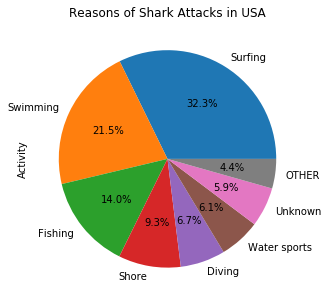

In [36]:
def pie_country_act(country):
    filt = attacks[attacks['Country'] == country]
    activ = filt.groupby('Activity').Activity.count().sort_values(ascending=False)
    plt.title(f'Reasons of Shark Attacks in {country}')
    return activ.plot.pie(figsize=(5,5), autopct='%1.1f%%')

pie_country_act('USA');

##### TENDENCIA LESIONES SEGUN ATAQUES EN USA: Las principales lesiones por ataque de tiburón en USA se dan en las extremidades, principalmente las piernas. Al ser los surfistas y bañistas los más afectados, éstas son las zonas más expuestas.

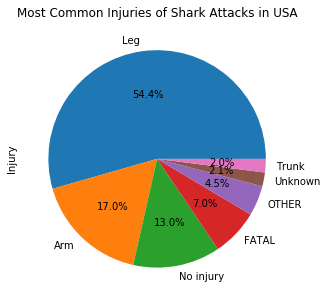

In [37]:
def pie_country_inj(country):
    filt = attacks[attacks['Country'] == country]
    activ = filt.groupby('Injury').Injury.count().sort_values(ascending=False)
    plt.title(f'Most Common Injuries of Shark Attacks in {country}')
    return activ.plot.pie(figsize=(5,5), autopct='%1.1f%%')

pie_country_inj('USA');

##### RAZONES DE ATAQUE EN AUTRALIA: La probabilidad de sufrir un ataque de tiburón en Australia es mayor para los bañistas y los pescadores, seguido por los surfistas.

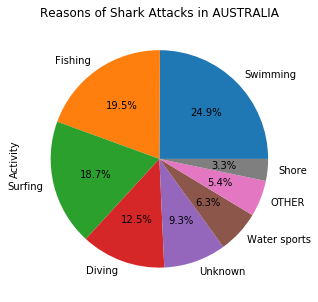

In [38]:
def pie_country_act(country):
    filt = attacks[attacks['Country'] == country]
    activ = filt.groupby('Activity').Activity.count().sort_values(ascending=False)
    plt.title(f'Reasons of Shark Attacks in {country}')
    return activ.plot.pie(figsize=(5,5), autopct='%1.1f%%')

pie_country_act('AUSTRALIA');

##### TENDENCIA LESIONES SEGUN ATAQUES EN AUSTRALIA: Las principales lesiones por ataque de tiburón en Australia se dan en las piernas. Sin embargo, también existe un porcentaje considerable de ataques que no provocan ninguna lesión o, por el contrario, acaban en muerte.

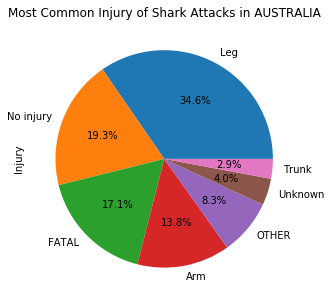

In [39]:
def pie_country_inj(country):
    filt = attacks[attacks['Country'] == country]
    activ = filt.groupby('Injury').Injury.count().sort_values(ascending=False)
    plt.title(f'Most Common Injury of Shark Attacks in {country}')
    return activ.plot.pie(figsize=(5,5), autopct='%1.1f%%')

pie_country_inj('AUSTRALIA');